<a href="https://colab.research.google.com/github/shivamranaaa/car-damage-detection/blob/main/car_damage_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download anujms/car-damage-detection

 99% 121M/123M [00:03<00:00, 40.1MB/s]
100% 123M/123M [00:03<00:00, 39.9MB/s]


In [ ]:
!unzip /content/car-damage-detection.zip

Archive:  /content/car-damage-detection.zip
  inflating: data1a/training/00-damage/0001.JPEG  
  inflating: data1a/training/00-damage/0002.JPEG  
  inflating: data1a/training/00-damage/0003.JPEG  
  inflating: data1a/training/00-damage/0004.JPEG  
  inflating: data1a/training/00-damage/0005.JPEG  
  inflating: data1a/training/00-damage/0006.JPEG  
  inflating: data1a/training/00-damage/0007.JPEG  
  inflating: data1a/training/00-damage/0008.JPEG  
  inflating: data1a/training/00-damage/0009.JPEG  
  inflating: data1a/training/00-damage/0010.JPEG  
  inflating: data1a/training/00-damage/0011.JPEG  
  inflating: data1a/training/00-damage/0012.JPEG  
  inflating: data1a/training/00-damage/0013.JPEG  
  inflating: data1a/training/00-damage/0014.JPEG  
  inflating: data1a/training/00-damage/0015.JPEG  
  inflating: data1a/training/00-damage/0016.JPEG  
  inflating: data1a/training/00-damage/0017.JPEG  
  inflating: data1a/training/00-damage/0018.JPEG  
  inflating: data1a/training/00-damage

start

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
labels = ['00-damage', '01-whole']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data('/content/data1a/training')
val = get_data('/content/data1a/validation')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


58/58 [==============================] - 20s 133ms/step - loss: 0.6936 - accuracy: 0.5082 - val_loss: 0.6943 - val_accuracy: 0.5022
Epoch 2/500
58/58 [==============================] - 5s 91ms/step - loss: 0.6913 - accuracy: 0.5147 - val_loss: 0.6951 - val_accuracy: 0.4870
Epoch 3/500
58/58 [==============================] - 5s 91ms/step - loss: 0.6901 - accuracy: 0.5380 - val_loss: 0.6932 - val_accuracy: 0.5130
Epoch 4/500
58/58 [==============================] - 5s 82ms/step - loss: 0.6888 - accuracy: 0.5348 - val_loss: 0.6917 - val_accuracy: 0.5239
Epoch 5/500
58/58 [==============================] - 5s 79ms/step - loss: 0.6883 - accuracy: 0.5429 - val_loss: 0.6906 - val_accuracy: 0.5283
Epoch 6/500
58/58 [==============================] - 5s 79ms/step - loss: 0.6846 - accuracy: 0.5451 - val_loss: 0.6891 - val_accuracy: 0.5478
Epoch 7/500
58/58 [==============================] - 5s 80ms/step - loss: 0.6874 - accuracy: 0.5413 - val_loss: 0.6887 - val_accuracy: 0.5609
Epoch 8/500
58/5

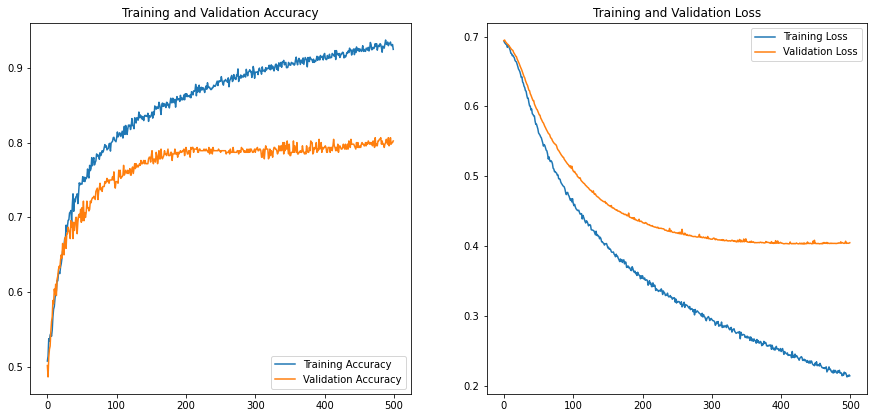

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()